In [1]:
# some useful modules
import numpy as np
import matplotlib.pyplot as plt
import subprocess
import matplotlib.animation as animation
from matplotlib.ticker import LogLocator
import matplotlib.ticker as ticker
from matplotlib.pyplot import cm
import re
# our custom specdist module where all our SD computations are done
import specdist as sd


# let's make a directory wher we save our figures today:
path_to_figures = sd.path_to_sd_projects + "figures/"
subprocess.call(['mkdir','-p',path_to_figures])
print("figure directory: %s"%path_to_figures)


# some labels for the figures
label_intensity = "Intensity, "+r'$\Delta I_x \quad [\mathrm{Jy/sr}]$'
label_scaled_frequency = "Scaled Frequency, "+ r'$x=h\nu/k_{_\mathrm{B}}T_{_\mathrm{CMB}}$'
label_y_firas = r'$y_\mathrm{COBE}=1.5\times 10^{-5}$'
label_mu_firas = r'$\mu_\mathrm{COBE}=9\times 10^{-5}$'
label_redshift = 'Redshift, '+r'$z$'
label_xe = 'Free Electron Fraction, '+r'$X_\mathrm{e}$'

# some conversion factors
xinj_to_mass = 4.698e-4 #m in ev = 4.698e-4 xinj
xinj_to_Einj = 4.698e-4/2. #Einj = 4.698e-4/2 xinj
mass_to_Einj = 1./2.

figure directory: /Users/boris/Work/SPECTRAL-DISTORTIONS/figures/


In [2]:
from pyDOE import *
import functools
import multiprocessing

In [3]:

# setting up the parameters:
ct = sd.cosmotherm()
# ct.ct_Gamma_dec = 1e-14

# ct.ct_Drho_rho_dec = 3.e-5
# ct.ct_pi_energy_norm = 2
ct.ct_include_pi = 0 
ct.ct_evolve_Xe = 0
ct.ct_zend = 4.99e6
ct.ct_zstart = 5e6
ct.ct_zlate = 0.
ct.ct_reionisation_model = 1
ct.ct_include_collisions = 0
ct.ct_emission_absorption_mode = 0
ct.ct_lyc = 0

ct.ct_npts = 3000


ct.ct_T0 = 2.7255
ct.ct_Yp = 0.245407
ct.ct_N_eff = 3.046
ct.ct_Omega_m = 0.312331
ct.ct_Omega_b = 0.0491137
ct.ct_h = 0.675422
ct.ct_heating_mode = 2

ct.save_Xe = 'no'
ct.ct_z_X = 500.


# defining which parameter values we want to compute:
nsamp = 16
p_name1 = 'decay: Drho/rho_CMB'
xmin = 1e-6
xmax = 1e-1
xinjs = np.geomspace(xmin,xmax,nsamp)
p_array1 = xinjs

p_name2 = 'z_X'
gmin = 1e5
gmax = 1e2
gs = np.geomspace(gmin,gmax,nsamp)
p_array2 = gs

# the directory name fo the final spectra
ct.save_dir_name = 'decay'



p_arrays = []
for i in range(nsamp):
    p_arrays.append([p_array1[i],p_array2[i]])
p_names = [p_name1,p_name2]

args = {}
# args['param_values_array'] = p_arrays
# args['param_name'] = p_names

args['param_values_array'] = p_array1
args['param_name'] = [p_name1]
args['save_spectra'] = 'no'

R = ct.run_cosmotherm_parallel(**args)


 ||  Entering CosmoTherm v2.0



 output-path: /Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/decay/tmp_4/
 addname    : .tmp.dat

 ||  Entering CosmoTherm v2.0


 ||  Entering CosmoTherm v2.0



 output-path: /Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/decay/tmp_5/
 addname    : .tmp.dat


 output-path: /Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/decay/tmp_1/
 addname    : .tmp.dat

 ||  Entering CosmoTherm v2.0



 output-path: /Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/decay/tmp_0/
 addname    : .tmp.dat

 ||  Entering CosmoTherm v2.0



 output-path: /Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/decay/tmp_3/
 addname    : .tmp.dat

 ||  Entering CosmoTherm v2.0



 output-path: /Users/boris/Work/SPECTRAL-DISTORTIONS/cosmotherm.rel_corr/runfiles/decay/tmp_2/
 addname    : .tmp.dat

 ||  Entering CosmoTherm v2.0


 ||  Entering CosmoTherm v2.0



 output-path: /Users/b

 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -811289 -8.11289e+07
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -1.74787e+06 -1.74787e+08
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -376567 -3.76567e+07
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -37656.7 -3.76567e+06
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -81128.9 -8.11289e+06
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -174787 -1.74787e+07
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -3.76567e+06 -3.76567e+08
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -8.11289e+06 -8.11289e+08
 find_root_brent:: Solve_global_energetics_large
 Root must be brackete

 ||  Starting thermalization computation

 Solve_global_energetics_large :: Computing f_X from total energetics of the Universe 
 compute_initial_runtime_parameters():
 initial Tg = 1.35933e+08 Te= 1.35933e+08 Te/Tg= 1 Drho==DTe/Tg = 0 DT_eff/Tz= -0.00250943
 Drho/rho= 0.01 Drho/rho|_est= -1.32778e-09

 Solve_global_energetics_large :: matching Dlnrho_CMB = 0.01 at z < 5e+07


 ||  Heating-mode #2

 Adding simple reionization treatment model 1
 Heating by decaying particles.
 Effective lifetime of particle 1/Gamma_X = 4.22203e+13 sec (or z_X = 500)
 Will determine f_X to yield Drho/rho = 0.0001


 || The chosen run mode is 'default'


 ||  Starting thermalization computation

 Solve_global_energetics_large :: Computing f_X from total energetics of the Universe 
 compute_initial_runtime_parameters():
 initial Tg = 1.36272e+08 Te= 1.36272e+08 Te/Tg= 1 Drho==DTe/Tg = 0 DT_eff/Tz= -2.50009e-05
 Drho/rho= 0.0001 Drho/rho|_est= -1.32778e-09

 Solve_global_energetics_large :: matching Dlnrho_

I) -3.76567e+08 -3.76567e+10
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -1.74787e+07 -1.74787e+09
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -1.74787e+08 -1.74787e+10
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -8.11289e+08 -8.11289e+10
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -3.76567e+07 -3.76567e+09
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -8.11289e+07 -8.11289e+09
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -3.76567e+09 -3.76567e+11
 find_root_brent:: Solve_global_energetics_large
 Root must be bracketed for bisection (III) -1.74787e+09 -1.74787e+11



 %------------------------------------------------% 
 % Clearing all GSL-splines (routines.cpp)        %
 %------------------------------------------------%
 

 ||  Exiting CosmoTherm v2.0


 %------------------------------------------------% 
 % Clearing all GSL-splines (routines.cpp)        %
 %------------------------------------------------%
 

 ||  Exiting CosmoTherm v2.0


 %------------------------------------------------% 
 % Clearing all GSL-splines (routines.cpp)        %
 %------------------------------------------------%
 

 ||  Exiting CosmoTherm v2.0


 %------------------------------------------------% 
 % Clearing all GSL-splines (routines.cpp)        %
 %------------------------------------------------%
 

 ||  Exiting CosmoTherm v2.0


 %------------------------------------------------% 
 % Clearing all GSL-splines (routines.cpp)        %
 %------------------------------------------------%
 

 ||  Exiting CosmoTherm v2.0


 %------------------------------------------

In [6]:
R[0]

{'decay: Drho/rho_CMB': 1e-06,
 'x': array([1.00000000e-05, 1.01237277e-05, 1.02489862e-05, ...,
        1.49003649e+02, 1.49500994e+02, 1.50000000e+02]),
 'DI': array([-2.33211296e-14, -2.39017909e-14, -2.44969124e-14, ...,
        -2.21375839e-60, -1.34241029e-60, -8.10241076e-61])}

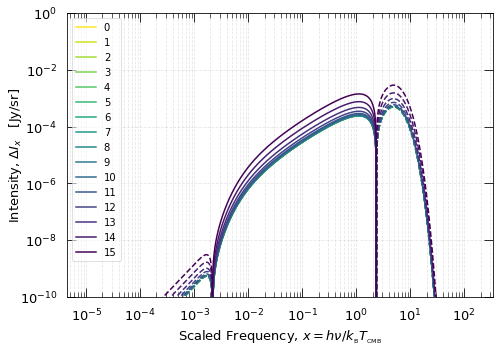

In [8]:

fig, ax = plt.subplots(1,1,figsize=(7,5))
label_size = 13
title_size = 13
legend_size = 25
handle_length = 0.5



# ymin=1e-4
# ymax = 5e0
# x_max = 1e4
# x_min = 1
# ax.set_xlim(x_min,x_max)
ax.set_ylim(1e-10,1e0)
ax.set_xscale('log')
ax.set_yscale('log')


ax.set_xlabel(label_scaled_frequency,size=title_size)
ax.set_ylabel(label_intensity,size=title_size)
ax.yaxis.set_label_coords(-.1,0.5)


# ax.yaxis.set_major_locator(LogLocator(numticks=15)) 
# ax.yaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.yaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.yaxis.set_tick_params(right='on',which='minor',direction='in',length=5)
ax.xaxis.set_tick_params(top='on',which='minor',direction='in',length=5)
ax.yaxis.set_tick_params(right='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)
ax.xaxis.set_tick_params(top='on',which='major',direction='in',length=9,labelsize=label_size,pad=10)

# manipulate x-axis ticks and labels
# ax.xaxis.set_major_locator(LogLocator(numticks=15)) 
# ax.xaxis.set_minor_locator(LogLocator(numticks=15,subs=np.arange(2,10))) 
for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(True) 

ax.grid( b=True, which="both", alpha=0.3, linestyle='--')
i = 0
color=iter(cm.viridis(np.linspace(1,0,len(xinjs))))
for p in args['param_values_array']:
    ccolor = next(color)
    ax.plot(R[i]['x'],R[i]['DI'],c=ccolor,label=str(i))
    ax.plot(R[i]['x'],-R[i]['DI'],c=ccolor,ls='--')

    i+=1






ax.legend(loc=2,ncol=1,frameon=True,framealpha=0.6,fontsize = 10)

fig.tight_layout()
plt.savefig(path_to_figures + '/ct_DI_tests.pdf')
plt.show()
plt.close(fig)